# Deep Learning using CNN on webscrapped images

Importing all required Libraries

In [9]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

In [49]:
input_shape=(150,150,3)
image_width=150
image_height=150
nb_train_samples=140
nb_validation_samples=20

batch_size= 20
epochs = 15

train_data_dir="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Train"
validation_data_dir="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Validation"


In [21]:
#Rescale the pixels values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

#automatically retrieves images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=16 ,class_mode='binary')

validation_generator=datagen.flow_from_directory(
                    validation_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=32 ,class_mode='binary')


Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Defining The Network

In [50]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 35, 35, 64)        0         
__________

In [51]:
import keras
import keras.utils
from keras import utils as np_utils
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# Data Augmentation

In [45]:
train_datagen_augmented=ImageDataGenerator(
                        rescale=1./255,shear_range=0.2,zoom_range=0.2,rotation_range=30,
                        horizontal_flip=True)


train_generator_augmented=train_datagen_augmented.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='binary')

Found 140 images belonging to 2 classes.


# Fitting the model

In [52]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                           validation_data=validation_generator,
                            validation_steps=nb_validation_samples//batch_size)

Epoch 1/15
7/7 [==============================] - 5s 766ms/step - loss: 5.1475 - acc: 0.5014 - val_loss: 0.6964 - val_acc: 0.5000
Epoch 2/15
7/7 [==============================] - 3s 374ms/step - loss: 0.7971 - acc: 0.5033 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 3/15
7/7 [==============================] - 3s 374ms/step - loss: 0.6809 - acc: 0.5219 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 4/15
7/7 [==============================] - 2s 357ms/step - loss: 0.6494 - acc: 0.5738 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 5/15
7/7 [==============================] - 3s 374ms/step - loss: 0.5712 - acc: 0.7108 - val_loss: 0.6759 - val_acc: 0.5000
Epoch 6/15
7/7 [==============================] - 3s 357ms/step - loss: 0.5436 - acc: 0.7648 - val_loss: 0.6391 - val_acc: 0.6000
Epoch 7/15
7/7 [==============================] - 3s 377ms/step - loss: 0.4811 - acc: 0.7835 - val_loss: 0.6206 - val_acc: 0.7000
Epoch 8/15
7/7 [==============================] - 3s 374ms/step - loss: 0.3769 - acc: 0.85

In [53]:
history_dict=history.history

In [55]:
history_dict

{'val_loss': [0.696402907371521,
  0.6927276849746704,
  0.6919798254966736,
  0.6880208253860474,
  0.6759365200996399,
  0.6391419172286987,
  0.6206377148628235,
  0.4567933678627014,
  0.40123724937438965,
  0.39746934175491333,
  0.26858532428741455,
  0.2795068621635437,
  0.26316753029823303,
  0.32981398701667786,
  0.22330670058727264],
 'val_acc': [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.6000000238418579,
  0.699999988079071,
  0.8500000238418579,
  0.8999999761581421,
  0.8999999761581421,
  0.8999999761581421,
  0.949999988079071,
  0.8999999761581421,
  0.8500000238418579,
  0.949999988079071],
 'loss': [5.338594596636923,
  0.7983761638402939,
  0.6804759114980697,
  0.6510087345775805,
  0.5669784694910049,
  0.5406321647920107,
  0.4767791047692299,
  0.375769679248333,
  0.2983727862960414,
  0.27009635269641874,
  0.20551597366207525,
  0.16325433626770974,
  0.12544653844088316,
  0.08703049958536499,
  0.10249272733926773],
 'acc': [0.4947368518302315,
  0.510000011324

# Plotting Loss charts

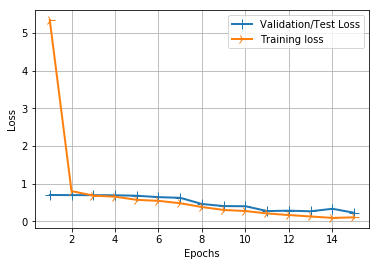

In [58]:

import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting accuracy charts

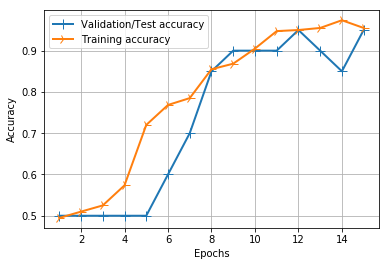

In [59]:
import matplotlib.pyplot as plt
accuracy=history_dict['acc']
val_accuracy_values=history_dict['val_acc']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Saving The model

In [60]:
model.save("Deep Learning on Shirt vs Tshirt web scrapped.h5 ")